In [1]:
import pandas as pd
import numpy as np

In [20]:
data=pd.read_csv("result.csv", header=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   packet count   2120 non-null   int64
 1   byte count     2120 non-null   int64
 2   duration       2120 non-null   int64
 3   idele timeout  2120 non-null   int64
 4   hard timeout   2120 non-null   int64
 5   Label          2120 non-null   int64
dtypes: int64(6)
memory usage: 99.5 KB


In [3]:
data.head()

,packet count,byte count,duration,idele timeout,hard timeout,Label
0,0,0,0,0,0,0
1,2,196,2,0,0,0
2,4,392,4,0,0,0
3,6,588,6,0,0,0
4,8,784,8,0,0,0


In [21]:
data_X=data.values[:,:5]
data_Y=data.values[:,-1]

In [5]:
data.shape

(2120, 6)

In [6]:
data.Label.value_counts(normalize=True).to_frame()

,Label
0,0.520755
1,0.479245


In [7]:
from sklearn import preprocessing

In [22]:
min_max_scaler=preprocessing.MinMaxScaler()
scale_range=min_max_scaler.fit(data_X)
scale_range

MinMaxScaler()

In [23]:
import joblib
joblib.dump(scale_range, 'scaler.gz')

['scaler.gz']

In [24]:
data_X=scale_range.transform(data_X)

In [11]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2)#split the data

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [27]:
#Model ANN
model_ANN = Sequential([
    Dense(12, activation='relu', input_dim=5),
    Dense(15, activation='relu'),
    Dense(18, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_ANN.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [28]:
history = model_ANN.fit(data_X, data_Y, epochs = 100,validation_split=0.2, verbose = 1, batch_size=50)

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2383 - accuracy: 0.6509 - val_loss: 0.2639 - val_accuracy: 0.0000e+00
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 0.2074 - accuracy: 0.6651 - val_loss: 0.2740 - val_accuracy: 0.4953
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1637 - accuracy: 0.8019 - val_loss: 0.2618 - val_accuracy: 0.4953
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1156 - accuracy: 0.9127 - val_loss: 0.2160 - val_accuracy: 0.5071
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0762 - accuracy: 0.9428 - val_loss: 0.1604 - val_accuracy: 0.6698
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0501 - accuracy: 0.9652 - val_loss: 0.1308 - val_accuracy: 0.7594
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0349 - accuracy: 0.9705 - val_loss: 0.1000 - val_accuracy: 0.8420
Epoch 8/1

Epoch 59/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.9971 - val_loss: 0.0089 - val_accuracy: 0.9882
Epoch 60/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.9982 - val_loss: 0.0134 - val_accuracy: 0.9764
Epoch 61/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.9971 - val_loss: 0.0084 - val_accuracy: 0.9882
Epoch 62/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 0.9982 - val_loss: 0.0112 - val_accuracy: 0.9835
Epoch 63/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 0.9976 - val_loss: 0.0091 - val_accuracy: 0.9882
Epoch 64/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.9976 - val_loss: 0.0079 - val_accuracy: 0.9906
Epoch 65/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 0.9971 - val_loss: 0.0078 - val_accuracy: 0.9906
Epoch 

In [78]:
model_ANN.save("model_ANN2.h5")

Text(0.5, 51.0, 'Predicted')

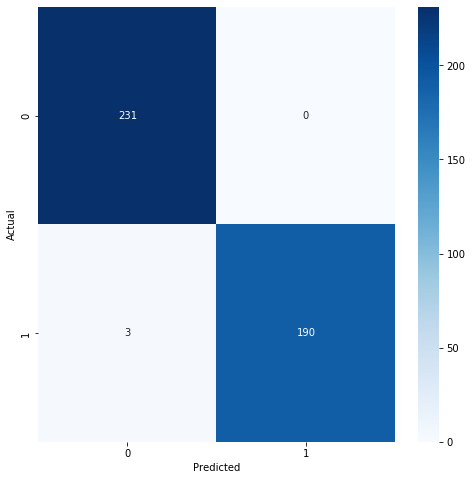

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
y_pred=(model_ANN.predict(X_test)>0.8).astype("int32")
conf_mat = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [30]:
from sklearn.metrics import classification_report
print(f'Classification Report: \n {classification_report(Y_test,y_pred)}')

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       231
           1       1.00      0.98      0.99       193

    accuracy                           0.99       424
   macro avg       0.99      0.99      0.99       424
weighted avg       0.99      0.99      0.99       424



In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [33]:
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy: %f' %accuracy)
precision = precision_score(Y_test, y_pred)
print('Precison: %f' %precision)
recall = recall_score(Y_test, y_pred)
print('Recall: %f' %recall)
f1 = f1_score(Y_test, y_pred)
print('F1: %f' %f1)

Accuracy: 0.992925
Precison: 1.000000
Recall: 0.984456
F1: 0.992167


In [34]:
features_size=data_X.shape[1]#number of features
window_size= 30#sequence length of input
samples=data_X.shape[0]-window_size#number of samples

In [35]:
I = np.zeros((samples, window_size, features_size))
for i in range(samples):
    temp=np.zeros((window_size, features_size))
    for j in range(i,i+window_size-1):
        temp[j-i] = data_X[j]
    I[i]=temp

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(I, data_Y[30:], test_size=0.2)#split the data

In [42]:
X_train.shape

(1672, 30, 5)

In [15]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional

In [16]:
model = Sequential()
    
model.add(Bidirectional(LSTM(64, activation='tanh', kernel_regularizer='l2')))
model.add(Dense(128, activation = 'relu', kernel_regularizer='l2'))
model.add(Dense(1, activation = 'sigmoid', kernel_regularizer='l2'))
    
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
history = model.fit(X_train, Y_train, epochs = 40,validation_split=0.2, verbose = 1)

Epoch 1/40
42/42 [==============================] - 3s 20ms/step - loss: 1.3538 - accuracy: 0.9791 - val_loss: 0.7208 - val_accuracy: 0.9940
Epoch 2/40
42/42 [==============================] - 0s 9ms/step - loss: 0.5584 - accuracy: 0.9746 - val_loss: 0.4691 - val_accuracy: 0.9134
Epoch 3/40
42/42 [==============================] - 0s 9ms/step - loss: 0.3260 - accuracy: 0.9596 - val_loss: 0.1852 - val_accuracy: 1.0000
Epoch 4/40
42/42 [==============================] - 0s 9ms/step - loss: 0.1822 - accuracy: 0.9903 - val_loss: 0.1152 - val_accuracy: 1.0000
Epoch 5/40
42/42 [==============================] - 0s 9ms/step - loss: 0.1319 - accuracy: 0.9903 - val_loss: 0.0812 - val_accuracy: 1.0000
Epoch 6/40
42/42 [==============================] - 0s 9ms/step - loss: 0.2500 - accuracy: 0.9297 - val_loss: 0.2012 - val_accuracy: 0.9612
Epoch 7/40
42/42 [==============================] - 0s 9ms/step - loss: 0.2516 - accuracy: 0.9514 - val_loss: 0.2155 - val_accuracy: 0.9313
Epoch 8/40
42/42 [=

Text(0.5, 51.0, 'Predicted')

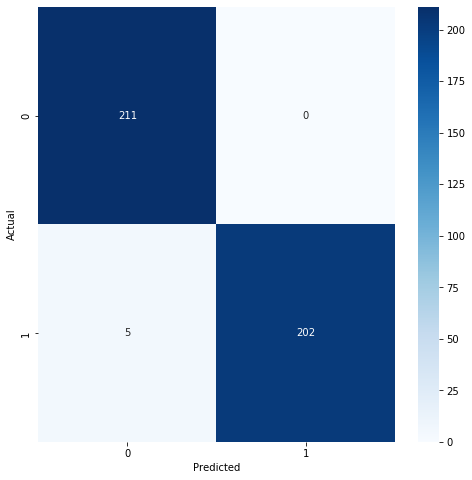

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
y_pred=(model.predict(X_test)>0.8).astype("int32")
conf_mat = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [38]:
from sklearn.metrics import classification_report
print(f'Classification Report: \n {classification_report(Y_test,y_pred)}')

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       211
           1       1.00      0.98      0.99       207

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418



In [39]:
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy: %f' %accuracy)
precision = precision_score(Y_test, y_pred)
print('Precison: %f' %precision)
recall = recall_score(Y_test, y_pred)
print('Recall: %f' %recall)
f1 = f1_score(Y_test, y_pred)
print('F1: %f' %f1)

Accuracy: 0.988038
Precison: 1.000000
Recall: 0.975845
F1: 0.987775


# Now we will use the transformer model

In [43]:
import tensorflow as tf

In [44]:
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates


def positional_encoding(position, d_model):
    angle_rads = get_angles( np.arange(position)[:, np.newaxis], np.arange(d_model)[np.newaxis, :], d_model)
    
    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    
    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)

In [45]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = tf.keras.layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = tf.keras.layers.Dropout(dropout)(x)

    # Feed Forward Part
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x)
    x = tf.keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = tf.keras.layers.Dropout(dropout)(x)
    x = tf.keras.layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x

In [46]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = tf.keras.Input(shape=input_shape)
    pos_encoding=positional_encoding(input_shape[0], window_size)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = tf.keras.layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = tf.keras.layers.Dense(dim, activation="relu")(x)
        x = tf.keras.layers.Dropout(mlp_dropout)(x)
    outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
    return tf.keras.Model(inputs, outputs)

In [47]:
input_shape = X_train.shape[1:]
model_transformer = build_model(input_shape, head_size=256, num_heads=4, ff_dim=4, num_transformer_blocks=1, mlp_units=[128], dropout=0.25, mlp_dropout=0.4)

model_transformer.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [48]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 0)

In [49]:
history = model_transformer.fit(X_train, Y_train, epochs = 40,validation_split=0.2, verbose = 1, batch_size=50, callbacks =[es])

Epoch 1/40
27/27 [==============================] - 2s 43ms/step - loss: 0.3448 - accuracy: 0.9521 - val_loss: 0.1084 - val_accuracy: 0.9940
Epoch 2/40
27/27 [==============================] - 1s 38ms/step - loss: 0.0719 - accuracy: 0.9933 - val_loss: 0.0081 - val_accuracy: 1.0000


Text(0.5, 51.0, 'Predicted')

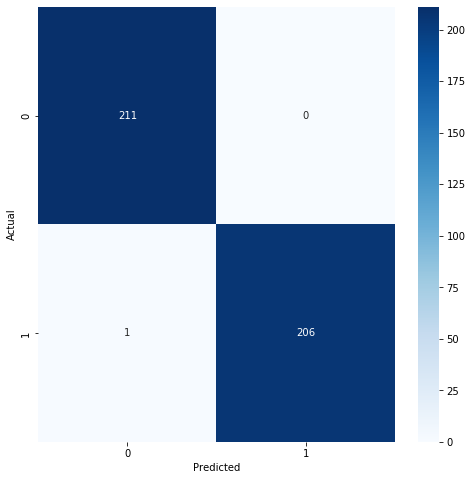

In [50]:
y_pred=(model_transformer.predict(X_test)>0.8).astype("int32")
conf_mat = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [51]:
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy: %f' %accuracy)
precision = precision_score(Y_test, y_pred)
print('Precison: %f' %precision)
recall = recall_score(Y_test, y_pred)
print('Recall: %f' %recall)
f1 = f1_score(Y_test, y_pred)
print('F1: %f' %f1)

Accuracy: 0.997608
Precison: 1.000000
Recall: 0.995169
F1: 0.997579
